In [1]:
cp /content/drive/MyDrive/UrbanSound8K.tar.gz /content/

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!tar -xvf /content/UrbanSound8K.tar.gz

Streaming output truncated to the last 5000 lines.
UrbanSound8K/audio/fold4/17480-2-0-6.wav
UrbanSound8K/audio/fold4/17480-2-0-9.wav
UrbanSound8K/audio/fold4/175904-2-0-11.wav
UrbanSound8K/audio/fold4/175904-2-0-24.wav
UrbanSound8K/audio/fold4/176003-1-0-0.wav
UrbanSound8K/audio/fold4/176638-5-0-0.wav
UrbanSound8K/audio/fold4/177756-2-0-10.wav
UrbanSound8K/audio/fold4/177756-2-0-4.wav
UrbanSound8K/audio/fold4/177756-2-0-5.wav
UrbanSound8K/audio/fold4/177756-2-0-7.wav
UrbanSound8K/audio/fold4/179862-1-0-0.wav
UrbanSound8K/audio/fold4/180977-3-1-1.wav
UrbanSound8K/audio/fold4/180977-3-1-5.wav
UrbanSound8K/audio/fold4/183989-3-1-21.wav
UrbanSound8K/audio/fold4/183989-3-1-23.wav
UrbanSound8K/audio/fold4/185709-0-0-0.wav
UrbanSound8K/audio/fold4/185709-0-0-1.wav
UrbanSound8K/audio/fold4/185709-0-0-6.wav
UrbanSound8K/audio/fold4/185709-0-0-7.wav
UrbanSound8K/audio/fold4/185909-2-0-102.wav
UrbanSound8K/audio/fold4/185909-2-0-13.wav
UrbanSound8K/audio/fold4/185909-2-0-17.wav
UrbanSound8K/audio

In [4]:
!pip install librosa

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd

In [6]:
filename= '/content/UrbanSound8K/audio/fold1/101415-3-0-2.wav'

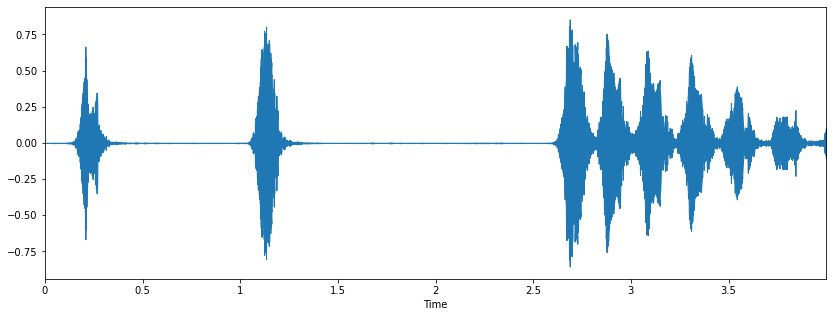

In [7]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)
librosa.display.waveplot(data,sample_rate)
ipd.Audio(filename)

In [8]:
data

array([-0.00011783, -0.00017157, -0.00017749, ..., -0.04598654,
       -0.04624664, -0.05089863], dtype=float32)

In [9]:
sample_rate

22050

In [10]:
from scipy.io import wavfile as wav
wav_sample_rate, wav_audio = wav.read(filename)

In [11]:
wav_sample_rate

48000

In [12]:
wav_audio

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

In [13]:
import pandas as pd
metadata= pd.read_csv('/content/UrbanSound8K/metadata/UrbanSound8K.csv')

In [14]:
metadata.head(15)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [15]:
metadata['classID'].value_counts()

7    1000
5    1000
4    1000
3    1000
2    1000
9    1000
0    1000
8     929
1     429
6     374
Name: classID, dtype: int64

Audio Preprocessing


In [16]:
#Reading a sample audio file using Librosa
import librosa
audio_file_p = '/content/UrbanSound8K/audio/fold1/102842-3-0-1.wav'
librosa_audio_data,librosa_sample_rate = librosa.load(audio_file_p)

In [17]:
librosa_audio_data

array([ 0.00680424,  0.01001977,  0.00837677, ..., -0.00625793,
       -0.00586295, -0.0068677 ], dtype=float32)

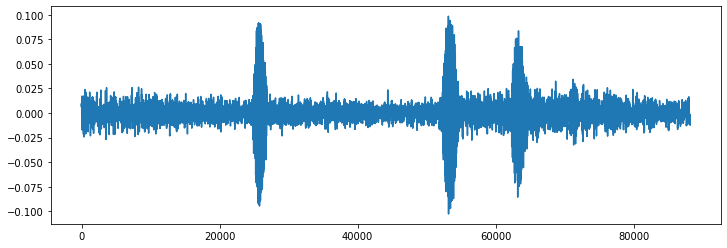

In [18]:
#Sampling an audio file using Librosa
#Plotting the audio data using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
#Original audio with 1 channel
plt.plot(librosa_audio_data)

In [23]:
#Reading audio file with scipy
from scipy.io import wavfile as wav
wave_sample_rate,wave_data = wav.read(audio_file_p)

In [24]:
wave_data

array([[ 354,  236],
       [ 370,  250],
       [ 377,  230],
       ...,
       [-302, -133],
       [-294, -193],
       [-229, -138]], dtype=int16)

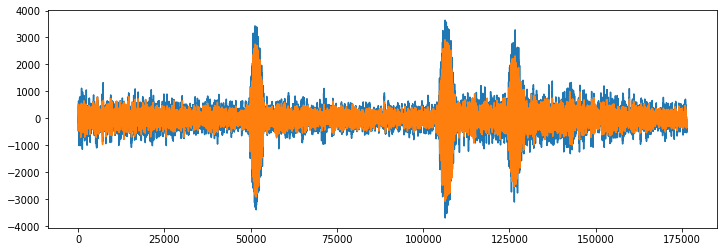

In [25]:
#Plotting original audio with 2 channels
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(wave_data)

**Extract Features**



In [34]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [35]:
mfccs

array([[-3.8864478e+02, -3.8446924e+02, -3.8501138e+02, ...,
        -4.0421951e+02, -4.0692419e+02, -4.0952161e+02],
       [ 1.0354500e+02,  1.0869227e+02,  1.0788033e+02, ...,
         8.8914955e+01,  8.6591629e+01,  8.9744270e+01],
       [ 4.1898392e+01,  4.2823776e+01,  4.4637337e+01, ...,
         3.1409901e+01,  3.4343258e+01,  3.5972404e+01],
       ...,
       [-6.7607517e+00, -6.8087730e+00, -5.2360363e+00, ...,
        -3.1211543e+00, -3.8434973e+00,  1.4803689e+00],
       [-7.7700911e+00, -9.0645590e+00, -9.6889687e+00, ...,
        -4.4382877e+00, -6.0224638e+00, -5.6966299e-01],
       [-5.0660133e-01, -1.5941626e-01, -3.9014680e+00, ...,
        -2.9968703e-01, -3.8074629e+00, -1.4818183e-01]], dtype=float32)

In [43]:
#Extract MFCCS from every audio file
import pandas as pd
import librosa
import os
import numpy as np
audio_dataset_p = '/content/UrbanSound8K/audio'
metadata = pd.read_csv('/content/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [44]:
def feature_extractor(file):
  audio,sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
  mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
  return mfccs_scaled_features

In [46]:
from tqdm import tqdm
#Iterating through every audio file and extracting features
#Using MFCCS
extracted_features = []
for index_num,row in tqdm(metadata.iterrows()):
  file_name= os.path.join(os.path.abspath(audio_dataset_p),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
  final_class_labels = row['class']
  data = feature_extractor(file_name)
  extracted_features.append([data, final_class_labels])

3555it [04:27, 12.97it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8325it [10:11, 19.73it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [10:39, 13.66it/s]


In [47]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265705,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [106]:
#Split dataset into dependent and independent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())


In [107]:
X.shape

(8732, 40)

In [108]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [109]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [110]:
y.shape

(8732, 10)

In [111]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [52]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0)

In [53]:
X_train.shape

(6985, 40)

In [54]:
X_test.shape

(1747, 40)

In [55]:
y_test.shape

(1747, 10)

In [56]:
y_train.shape

(6985, 10)

**Model Creation**

In [61]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Flatten,Dense,Activation
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [63]:
#No. of classes
num_labels = y.shape[1]

In [93]:
model = Sequential()

#First Layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Second Layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Third Layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Fourth Layer
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))


#Final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [94]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [95]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [114]:
#Model Training
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_of_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/content/saved_models/audio_classification.hdf5', verbose = 1,save_best_only = True )
start = datetime.now()

model.fit(X_train, y_train, batch_size= num_batch_size, epochs = num_of_epochs,validation_data=(X_test,y_test), callbacks=[checkpointer] )

duration = datetime.now() - start
print("Training completed in time:",duration)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.9461 - accuracy: 0.7008 - val_loss: 0.8103 - val_accuracy: 0.7624

Epoch 00001: val_loss improved from inf to 0.81027, saving model to /content/saved_models/audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.9774 - accuracy: 0.6870 - val_loss: 0.7928 - val_accuracy: 0.7728

Epoch 00002: val_loss improved from 0.81027 to 0.79275, saving model to /content/saved_models/audio_classification.hdf5
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.9816 - accuracy: 0.6893 - val_loss: 0.7935 - val_accuracy: 0.7670

Epoch 00003: val_loss did not improve from 0.79275
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.9710 - accuracy: 0.6949 - val_loss: 0.7820 - val_accuracy: 0.7670

Epoch 00004: val_loss improved from 0.79275 to 0.78199, saving model to /content/saved_models/audio_classification.hdf5
Epoch 5/100
219/2

In [113]:
test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(test_accuracy[1])

0.7653119564056396


In [91]:
filename = '/content/UrbanSound8K/audio/fold7/101848-9-0-0.wav'
prediction_features = feature_extractor(filename)
prediction_features = prediction_features.reshape(1,-1)
#predictions = (model.predict(prediction_features))
#predictions
predict=model.predict(prediction_features)
classes=np.argmax(predict,axis=1)
classes


array([9])

In [92]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

**Testing**


In [119]:
filename = '/content/UrbanSound8K/audio/fold4/107653-9-0-18.wav'
audio,sample_rate = librosa.load(filename,res_type = 'kaiser_fast')
mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predict=model.predict(mfccs_scaled_features)
classes=np.argmax(predict,axis=1)
print(classes)
prediction_class = labelencoder.inverse_transform(classes)
prediction_class





[-319.0613      80.638336   -36.042923    10.056942   -20.789503
   35.31836    -11.303141    10.287437     4.402736    10.765098
   -8.66018      8.53915    -15.814194    17.686943    -5.946551
   21.146233    -9.418149    13.5866375   -8.638724    -5.912974
   -7.268405     9.001198    -0.7308023    4.270673     1.046355
    1.1688408   -7.8288646    0.6413592   -0.9951205    6.768585
    8.287582     2.8731437   -3.4789438   -2.365673    -4.155221
   -2.8658836   -1.598754     3.2191339    4.4074225    1.3948034]
[[-319.0613      80.638336   -36.042923    10.056942   -20.789503
    35.31836    -11.303141    10.287437     4.402736    10.765098
    -8.66018      8.53915    -15.814194    17.686943    -5.946551
    21.146233    -9.418149    13.5866375   -8.638724    -5.912974
    -7.268405     9.001198    -0.7308023    4.270673     1.046355
     1.1688408   -7.8288646    0.6413592   -0.9951205    6.768585
     8.287582     2.8731437   -3.4789438   -2.365673    -4.155221
    -2.8658836  

array(['street_music'], dtype='<U16')

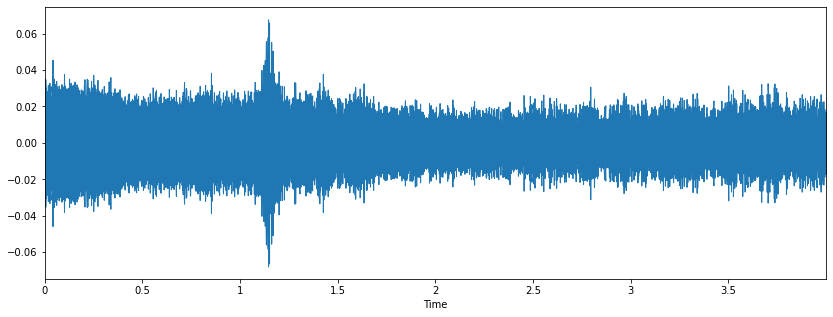

In [120]:
filename = '/content/UrbanSound8K/audio/fold4/107653-9-0-18.wav'
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)
librosa.display.waveplot(data,sample_rate)
ipd.Audio(filename)